# Lending club case study

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

## Assignment:

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

    **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

In this case study,EDA will be used to understand how consumer attributes and loan attributes influence the tendency of default.

In [1]:
#importing all the necesarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
#managing the view of output in jupyter notebook
%matplotlib inline
warnings.filterwarnings('ignore')#ignoring the display of warnings
#pd.set_option('max_rows',None)
#pd.set_option('max_columns',None)
sns.set(style='whitegrid')

### Importing the dataset
The dataset **loan.csv**  contains the complete loan data for all loans issued through the time period 2007 t0 2011. 

In [3]:
loan = pd.read_csv('loan.csv',encoding='ISO-8859-1')#importing the dataset loan.csv

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Cleaning the dataset 

Finding the no of missing values in every column

In [5]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
loan.dropna(how='all',axis=1,inplace=True)

In [7]:
loan.shape

(39717, 57)

In [8]:
loan.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
collection_recovery_fee           0
acc_now_delinq                    0
application_type                  0
url                               0
pymnt_plan                        0
loan_status                       0
issue_d                           0
verification_status               0
annual_inc                        0
home_ownership                    0
delinq_amnt                       0
sub_grade                         0
grade                             0
installment                 

We can also drop the values having a significant amount(say > 60%) of null values assuming that analysing them might give biased result. We can also drop **desc** as it has around 33% null values and it contains feedback statement which is not relevant for this analysis

In [9]:
loan.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc'],axis=1,inplace=True)

In [10]:
loan.shape

(39717, 53)

In [11]:
loan.isnull().sum().sort_values(ascending=False)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
annual_inc                       0
pymnt_plan                       0
url                              0
purpose                          0
loan_status                      0
issue_d                          0
verification_status              0
sub_grade                        0
home_ownership                   0
addr_state                       0
grade                            0
installment                      0
int_rate                         0
term                             0
funded_amnt_inv                  0
funded_amnt                      0
loan_amnt                        0
member_id                        0
zip_code            

Analyzing the remaining columns with null values 

In [12]:
x=loan.isnull().sum()
x.loc[x>0]

emp_title                     2459
emp_length                    1075
title                           11
revol_util                      50
last_pymnt_d                    71
last_credit_pull_d               2
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
pub_rec_bankruptcies           697
tax_liens                       39
dtype: int64

Finding the no of unique values in all the remaining column with null values.

In [13]:
print('No of unique values in column with null values')
print('emp_title :',len(loan.emp_title.unique()))
print('emp_length  :',len(loan.emp_length .unique()))
print('title :',len(loan.title.unique()))
print('revol_util :',len(loan.revol_util.unique()))
print('last_pymnt_d :',len(loan.last_pymnt_d.unique()))
print('last_credit_pull_d :',len(loan.last_credit_pull_d.unique()))
print('collections_12_mths_ex_med :',len(loan.collections_12_mths_ex_med.unique()))
print('chargeoff_within_12_mths :',len(loan.chargeoff_within_12_mths.unique()))
print('pub_rec_bankruptcies :',len(loan.pub_rec_bankruptcies.unique()))
print('tax_liens :',len(loan.tax_liens.unique()))

No of unique values in column with null values
emp_title : 28821
emp_length  : 12
title : 19616
revol_util : 1090
last_pymnt_d : 102
last_credit_pull_d : 107
collections_12_mths_ex_med : 2
chargeoff_within_12_mths : 2
pub_rec_bankruptcies : 4
tax_liens : 2


In [14]:
print('tax_liens:\n',loan.tax_liens.value_counts())
print('\n\npub_rec_bankruptcies:\n',loan.pub_rec_bankruptcies.value_counts())
print('\n\nchargeoff_within_12_mths:\n',loan.chargeoff_within_12_mths.value_counts())
print('\n\ncollections_12_mths_ex_med:\n',loan.collections_12_mths_ex_med.value_counts())
print('\n\nemp_length:\n',loan.emp_length.value_counts())

tax_liens:
 0.0    39678
Name: tax_liens, dtype: int64


pub_rec_bankruptcies:
 0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


chargeoff_within_12_mths:
 0.0    39661
Name: chargeoff_within_12_mths, dtype: int64


collections_12_mths_ex_med:
 0.0    39661
Name: collections_12_mths_ex_med, dtype: int64


emp_length:
 10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


Dropping the columns which has the value as either 0 or Null 

In [15]:
loan.drop(['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'],axis=1,inplace=True)

In [16]:
loan.shape

(39717, 50)

**public_rec_bankruptcies** is the no of public record of bankruptcies and it has 697 null values. Imputing the bankruptcies record is not suitable so it will be better to drop these rows 

In [17]:
loan=loan[-loan.pub_rec_bankruptcies.isnull()]

emp_title and emp_length also has null values which can be dropped as null count is less compared to wholw data set. Also, imputing personal data may not be correct and it might create bias.

In [18]:
loan=loan[-loan.emp_title.isnull()]
loan=loan[-loan.emp_length.isnull()]

In [19]:
loan.shape

(36548, 50)

In [20]:
loan.isnull().sum().sort_values(ascending=False)

last_pymnt_d               64
revol_util                 46
title                       9
pub_rec_bankruptcies        0
home_ownership              0
zip_code                    0
purpose                     0
url                         0
pymnt_plan                  0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
emp_length                  0
dti                         0
emp_title                   0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
term                        0
funded_amnt_inv             0
funded_amnt                 0
loan_amnt                   0
member_id                   0
addr_state                  0
delinq_2yrs                 0
delinq_amnt                 0
total_rec_prncp             0
acc_now_delinq              0
application_type            0
policy_code                 0
last_credit_pull_d          0
last_pymnt

There are few null values still present. No is very less we can drop those rows.

In [21]:
loan=loan[-loan.last_pymnt_d.isnull()]
loan=loan[-loan.revol_util.isnull()]
loan=loan[-loan.title.isnull()]

In [22]:
loan.shape

(36433, 50)

In [23]:
loan.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies       0
home_ownership             0
addr_state                 0
zip_code                   0
title                      0
purpose                    0
url                        0
pymnt_plan                 0
loan_status                0
issue_d                    0
verification_status        0
annual_inc                 0
emp_length                 0
delinq_amnt                0
emp_title                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
funded_amnt                0
loan_amnt                  0
member_id                  0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
acc_now_delinq             0
application_type           0
policy_code                0
last_credit_pull_d         0
last_pymnt_amnt            0
last_pymnt_d               0
collection_rec

#### Removing columns not relevant for analysis

In [24]:
#finding the no of unique values in all columns
loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

We can drop some columns mentioned below:
- **id,member_id,url** - There are different values for each entry which will not be useful for analysis.
- **title** - It has been categorized in the column purpose. 
- **emp_title** - It is not much relavant for this study. Here employees experience and salary is much more relavant 
- **zip_code** - It has also been categorised in addr_state
- **pymnt_plan** - Has the same entries for all rows i.e.; n
- **initial_list_status** - Has the same entries for all rows i.e.; f
- **policy_code** - Has the same entries for all rows i.e.; 1
- **acc_now_delinq ,delinq_amnt** - Has the same entries for all rows i.e.; 0
- **application_type** - Has the same entries for all rows i.e.; INDIVIDUAL

In [25]:
loan.drop(['id','member_id','url','title','emp_title','zip_code','pymnt_plan','initial_list_status','policy_code',
           'acc_now_delinq','delinq_amnt','application_type'],axis=1,inplace=True)

In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36433 non-null  int64  
 1   funded_amnt              36433 non-null  int64  
 2   funded_amnt_inv          36433 non-null  float64
 3   term                     36433 non-null  object 
 4   int_rate                 36433 non-null  object 
 5   installment              36433 non-null  float64
 6   grade                    36433 non-null  object 
 7   sub_grade                36433 non-null  object 
 8   emp_length               36433 non-null  object 
 9   home_ownership           36433 non-null  object 
 10  annual_inc               36433 non-null  float64
 11  verification_status      36433 non-null  object 
 12  issue_d                  36433 non-null  object 
 13  loan_status              36433 non-null  object 
 14  purpose               

There are many columns with date values but their data type is object. It is important to convert them to date format

In [27]:
loan.issue_d.head()

1    Dec-11
3    Dec-11
4    Dec-11
5    Dec-11
6    Dec-11
Name: issue_d, dtype: object

In [28]:
loan.earliest_cr_line.head()

1    Apr-99
3    Feb-96
4    Jan-96
5    Nov-04
6    Jul-05
Name: earliest_cr_line, dtype: object

In [29]:
loan.last_pymnt_d.head()

1    Apr-13
3    Jan-15
4    May-16
5    Jan-15
6    May-16
Name: last_pymnt_d, dtype: object

In [30]:
loan.last_credit_pull_d.head()

1    Sep-13
3    Apr-16
4    May-16
5    Jan-16
6    May-16
Name: last_credit_pull_d, dtype: object

In [31]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [32]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   funded_amnt              36433 non-null  int64         
 2   funded_amnt_inv          36433 non-null  float64       
 3   term                     36433 non-null  object        
 4   int_rate                 36433 non-null  object        
 5   installment              36433 non-null  float64       
 6   grade                    36433 non-null  object        
 7   sub_grade                36433 non-null  object        
 8   emp_length               36433 non-null  object        
 9   home_ownership           36433 non-null  object        
 10  annual_inc               36433 non-null  float64       
 11  verification_status      36433 non-null  object        
 12  issue_d                  36433 n

Creating column for month and year for date columns

In [33]:
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year
loan['last_pymnt_d_month'] = loan['last_pymnt_d'].dt.month
loan['last_pymnt_d_year'] = loan['last_pymnt_d'].dt.year
loan['last_credit_pull_d_month'] = loan['last_credit_pull_d'].dt.month
loan['last_credit_pull_d_year'] = loan['last_credit_pull_d'].dt.year

Checking if the year value of issue date and earliest credit line has not converted to > 2011

In [34]:
loan[loan['issue_d'].dt.year>2011]['issue_d'].unique()

array([], dtype='datetime64[ns]')

In [35]:
loan[loan['earliest_cr_line'].dt.year>2011]['earliest_cr_line'].dt.year.unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

There are values with year greater than 2011. This might be due to conversion it took 2000s instead of 1900s. It needs to be corrected. 

In [36]:
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

Converting columns with percentage into float by removing %

In [37]:
loan['int_rate'] = loan.int_rate.apply(lambda x:float(x.strip('%')))
loan['revol_util'] = loan.revol_util.apply(lambda x:float(x.strip('%')))

In [38]:
loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 2.1 MB


Removing months from term  

In [39]:
loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [40]:
loan['term'] = loan.term.apply(lambda x: x.split()[0])

In [41]:
loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

#### Plotting the amount distribution of Loan amount, funded amount and amount funded by investor 

<function matplotlib.pyplot.show(*args, **kw)>

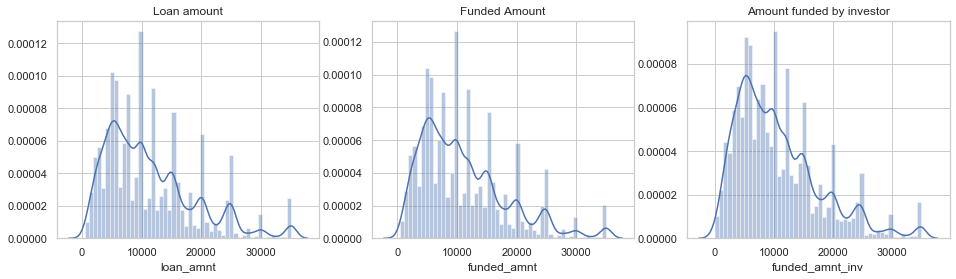

In [42]:
plt.figure(figsize=[16,4])
plt.subplot(1, 3,1)
sns.distplot(loan.loan_amnt)
plt.title('Loan amount')
plt.subplot(1, 3,2)
plt.title('Funded Amount')
sns.distplot(loan.funded_amnt)
plt.subplot(1, 3,3)
plt.title('Amount funded by investor')
sns.distplot(loan.funded_amnt_inv)
plt.show

Since the distribution of all the three amount are of same shape that means we can remove two of the amount and we can only keep the funded_amnt  

In [43]:
loan.drop(['loan_amnt','funded_amnt_inv'],axis=1,inplace=True)

In [44]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

Here we dont need the data of Current loan status to analye the defaulters. So, we can filter the data. 

In [45]:
loan=loan[-(loan.loan_status=='Current')]

In [46]:
loan.shape

(35367, 44)

## Data Analysis

### Defining functions for plotting  

In [47]:
# For annotations of plot
def annot(a):
    for p in a.patches:
        a.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),
            ha='center',va='center',xytext=(0, 10),textcoords='offset points')
    return a

In [48]:
# General function for plotting bar plots of categorical variables
def percent(df,gby,size=(15,7),r=1,c=2,kind='bar'):
    plt.figure(figsize=size)
    #Plot for calculating percentage of variation of different attributes types 
    plt.subplot(r, c, 1)
    plt.title('Total',fontsize=18)
    #a=(100*df.groupby(gby)[gby].count()/df[gby].count()).plot(color=sns.color_palette("husl", 20),kind=kind)
    a=sns.barplot(data=df,x=gby,y='term',hue='loan_status',estimator=lambda x:len(x) / len(df) * 100,palette="husl",
                 order=sorted(df[gby].unique()))
    a.set_ylabel('% of '+gby)
    annot(a)
    
    #This plot represent the data of defaulters for a particular attribute
    plt.subplot(r, c, 2)
    grp = df.groupby(['loan_status',gby])[gby].count()
    cnt = df.groupby(gby)[gby].count()
    percentages = grp.unstack() * 100 / cnt.T
    a = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 20))
    annot(a)
    a.set_ylabel('% of '+ 'Default Rate in '+gby)

    plt.tight_layout()
    plt.show()

In [49]:
#To see the distribution percentage of defaulters
def per_plot(df,gby,size=(10,5),kind='bar'):
    plt.figure(figsize=size)
    plt.title('Charged Off',fontsize=18)
    a=(100*df[df.loan_status=='Charged Off'].groupby(gby)[gby].count()/df[df.loan_status=='Charged Off'][gby].
       count()).plot(color=sns.color_palette("husl", 20),kind=kind)
    a.set_ylabel('% of '+gby)
    annot(a)

In [50]:
#Plotting for numeriac variable and observing the variation 
def distribution(df,c,size=(6,5)):
    #plt.figure(figsize=size)
    a=sns.distplot(df[c])
    plt.show()
    print(df.groupby('loan_status')[c].describe())

### Univariate and Segmented Univariate analysis 

#### Loan status percentage: 

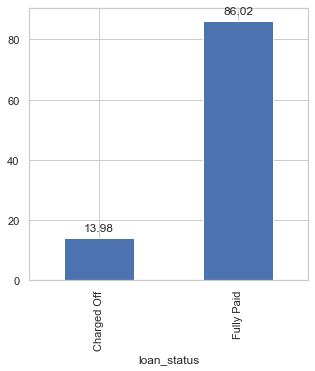

In [51]:
plt.figure(figsize=(5,5))
a=(100*loan.groupby('loan_status').funded_amnt.count()/len(loan)).plot.bar()
annot(a)
plt.show()

- There is a default rate of around 14% in overall loan nos.  

#### issue_d :

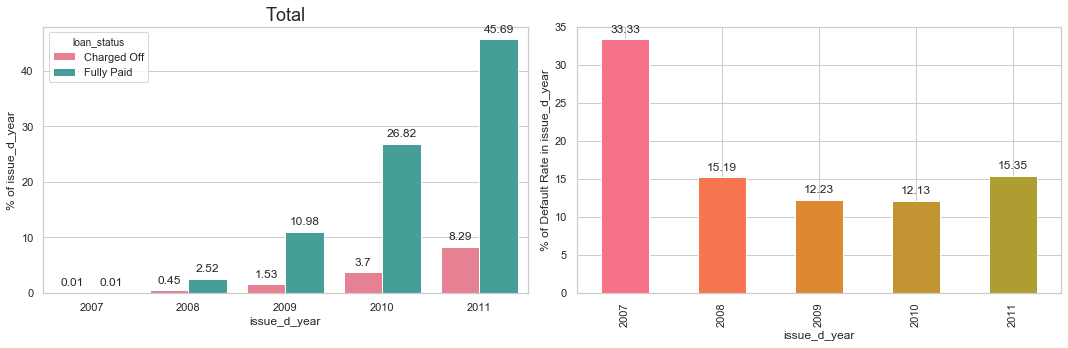

In [52]:
percent(loan,'issue_d_year',(15,5))

- The no of loans given has increased significantly from 2007 to 2011.
- Percentage of defaulter in an year was highest in 2007 then it is almost same.

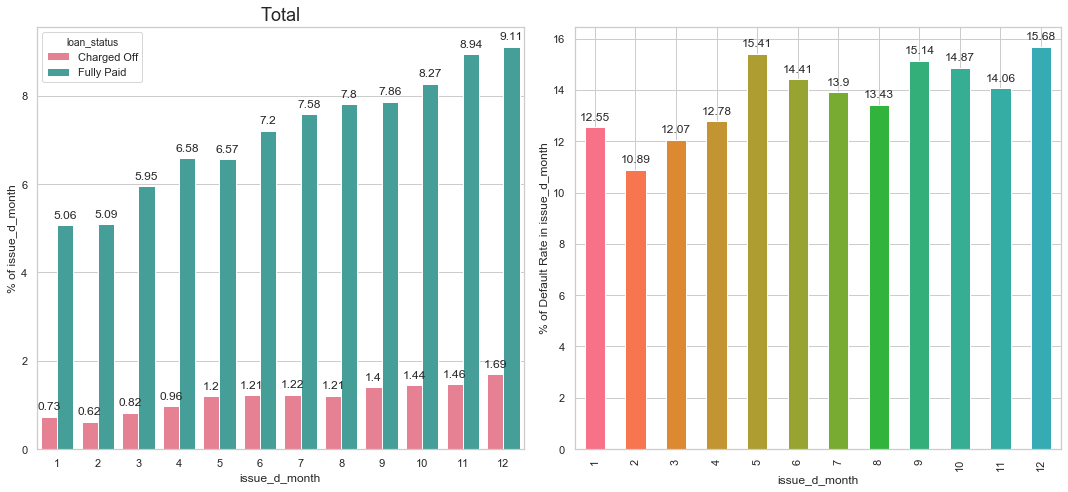

In [53]:
percent(loan,'issue_d_month')

- Loan issued towards the end of the year is more likely to be Charged off as more loan is issued around year end.
- Loan issued in early months are less likely to default.

#### funded_amnt:

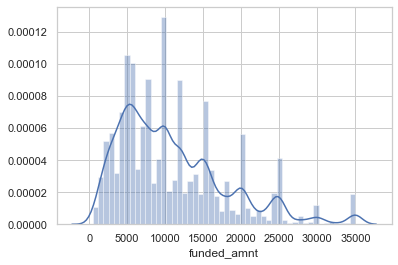

               count          mean          std     min     25%      50%  \
loan_status                                                                
Charged Off   4943.0  11925.318632  7734.585755  1000.0  6000.0  10000.0   
Fully Paid   30424.0  10694.503517  6940.442933   500.0  5400.0   9500.0   

                 75%      max  
loan_status                    
Charged Off  16000.0  35000.0  
Fully Paid   14700.0  35000.0  
Mean : 
Funded amount(Total) 10866.525998812453
Funded amount(Charged Off) 11925.318632409468


In [54]:
distribution(loan,'funded_amnt')
print('Mean : \nFunded amount(Total)', loan.funded_amnt.mean())
print('Funded amount(Charged Off)', loan[loan.loan_status=='Charged Off'].funded_amnt.mean())

- The funded amount shows that maximum no of loans are near 5000$ and the mean amount of loan for defaulters is higher.
- There is a spike at all the amount which are multiples of 5000 indicating that loan amount are mostly issued in that pattern.
- Maximum amount of loan is 35000 and minimum is 500. 

In [55]:
#Creating Derived categorical variable for making bins of funded amount
loan['funded_amnt_bin'] = pd.cut(loan['funded_amnt'], [x for x in range(0, 37000, 4000)],
                                 labels=[str(x)+'-'+str(x+4)+'k' for x in range (0, 36, 4)])

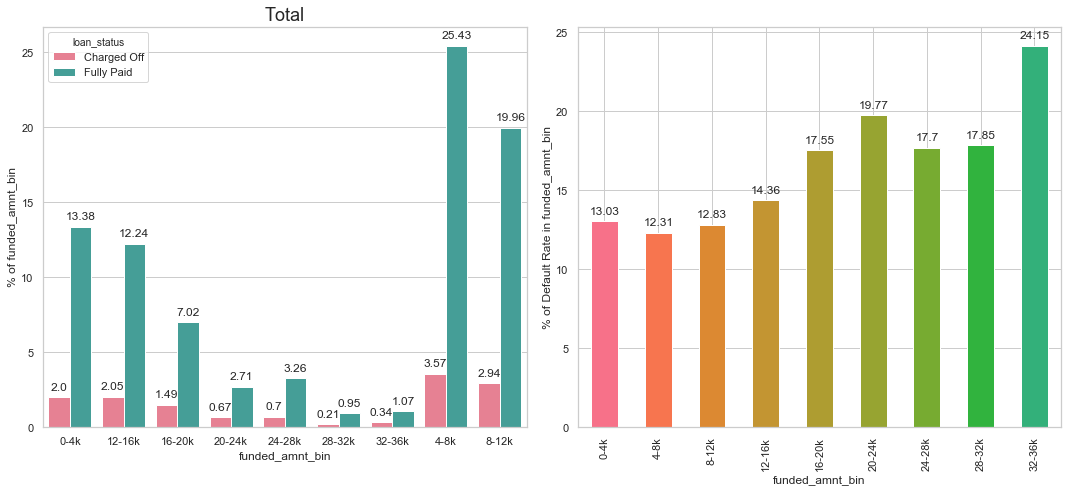

In [56]:
percent(loan,'funded_amnt_bin')

- Default Rate is high with higher amount of loan

#### Term: 

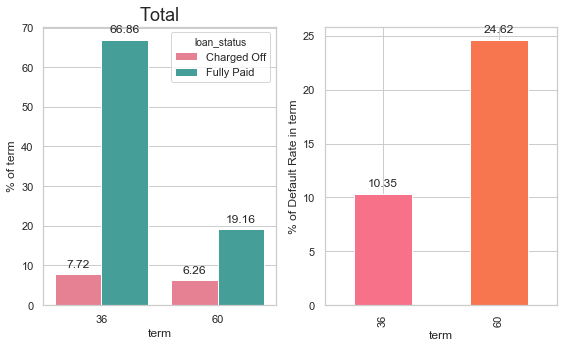

In [57]:
percent(loan,'term',(8,5))

- No of loan issued for 3 year term is higher
- Tendency to be Defaulters is more in 5 year term around  25%.

#### Interest Rate:

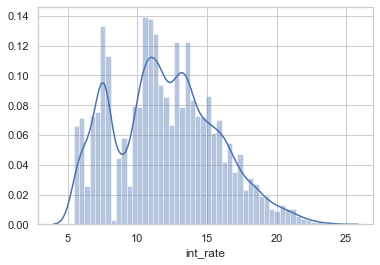

               count       mean       std   min    25%    50%    75%    max
loan_status                                                                
Charged Off   4943.0  13.929828  3.647619  5.42  11.49  13.79  16.45  24.40
Fully Paid   30424.0  11.667243  3.613734  5.42   8.59  11.49  14.09  24.11


In [58]:
distribution(loan,'int_rate')

In [59]:
#Creating Derived categorical variable for making bins of interest rate
loan['int_rate_bin'] = pd.cut(loan['int_rate'], [x for x in range(5, 29, 3)],
                                 labels=[str(x)+'-'+str(x+3)+'%' for x in range (5, 26, 3)])

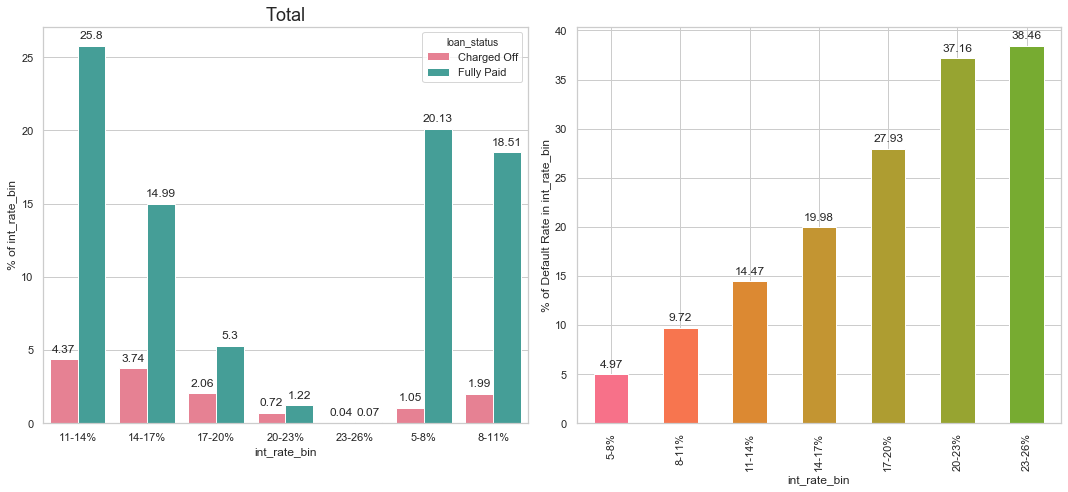

In [60]:
percent(loan,'int_rate_bin')

- Most of interest rate given is in the region around 13% . Interest rate varies from 5.42% to 24.40%. 
- Higher interest rate are more likely to be charged off 

#### Installments: 

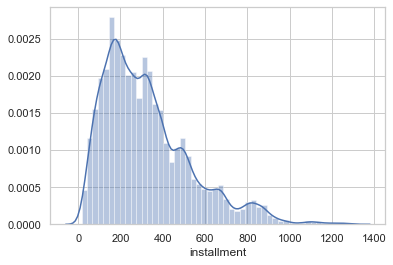

               count        mean         std    min       25%     50%  \
loan_status                                                             
Charged Off   4943.0  338.848452  214.527655  22.79  172.4350  298.33   
Fully Paid   30424.0  321.638693  205.828423  16.08  167.2975  278.24   

                  75%      max  
loan_status                     
Charged Off  458.3150  1305.19  
Fully Paid   422.3075  1295.21  
Mean installment 324.04398167783256


In [61]:
distribution(loan,'installment')
print('Mean installment',loan.installment.mean())

- Mean installment is 324.04 the charged off loan has a higher installments which is obvious 

#### Grade & Sub-grade: 

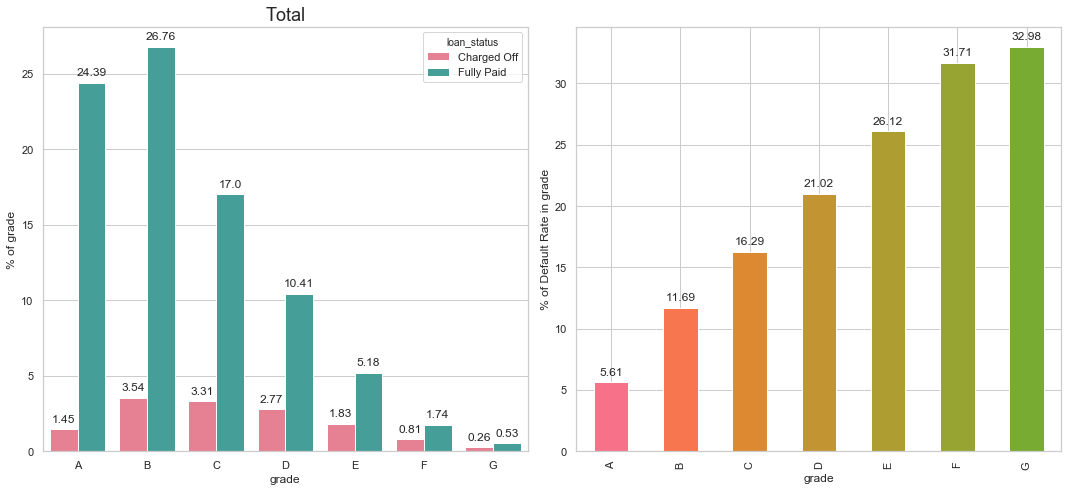

In [62]:
percent(loan,'grade')

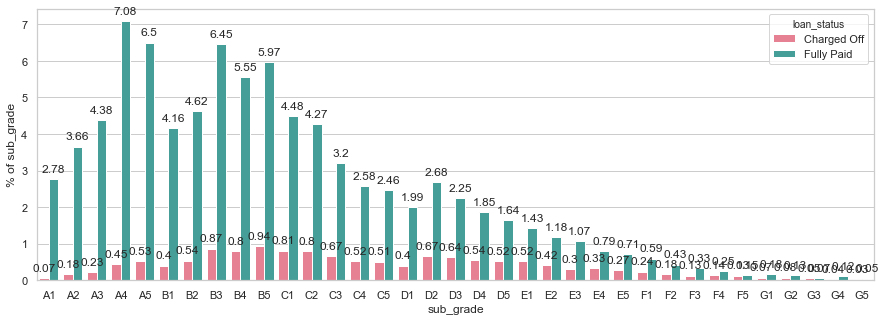

In [63]:
plt.figure(figsize=(15,5))
#plt.title('Total',fontsize=18)
plot_order = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5',
             'E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5']
a=sns.barplot(data=loan,x='sub_grade',y='term',hue='loan_status',estimator=lambda x:len(x) / len(loan) * 100,palette="husl"
             ,order=plot_order)
a.set_ylabel('% of '+'sub_grade')  
annot(a)

 - The defaulter no compare to fully paid is very less in A then B then C tll G which shows that loan assigning on the basis of grading is efficient.
 - Charged off percentage in G grade and least in A 

#### Employment Length : 

In [64]:
def emplen(x):
    if x in ['< 1 year','1 year','2 years','3 years']:
        return ('0-3 years')
    elif x in ['4 year','5 years','6 years']:
        return ('4-6 years')
    elif x in ['7 year','8 years','9 years']:
        return ('7-9 years')
    else: return (x)

In [65]:
loan.emp_length=loan.emp_length.apply(emplen)
loan.emp_length.value_counts()

0-3 years    14853
10+ years     8028
4-6 years     5105
4 years       3206
7-9 years     2537
7 years       1638
Name: emp_length, dtype: int64

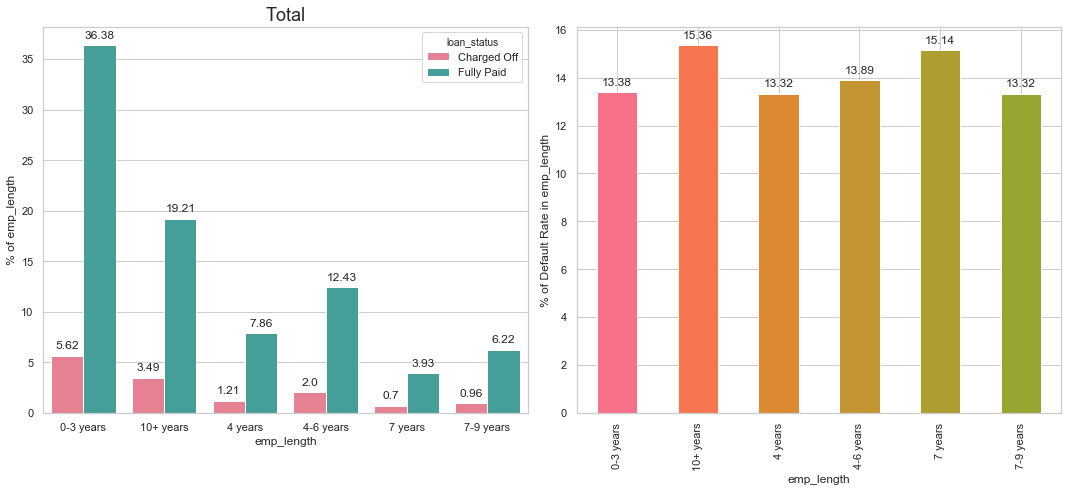

In [66]:
percent(loan,'emp_length')

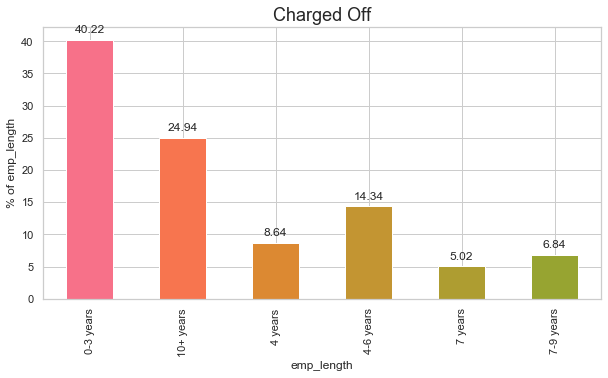

In [67]:
per_plot(loan,'emp_length')

- Maximum  employe has experience in range 0-3 years. Defaulters percantage in all group is similar 13-15%. In overall data set No of defaulters is high in 0-3 years because this age group has maximum no of loans

#### Home ownership status:

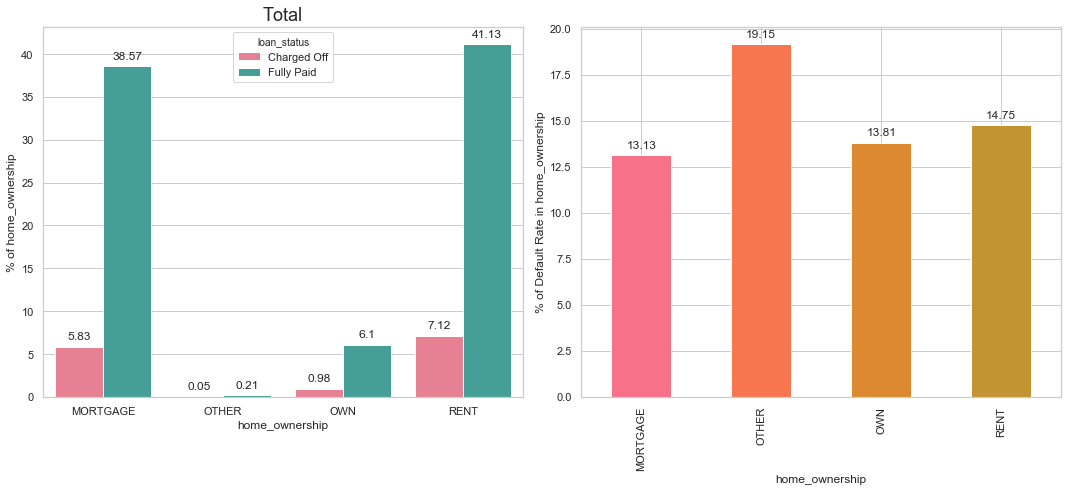

In [68]:
percent(loan,'home_ownership')

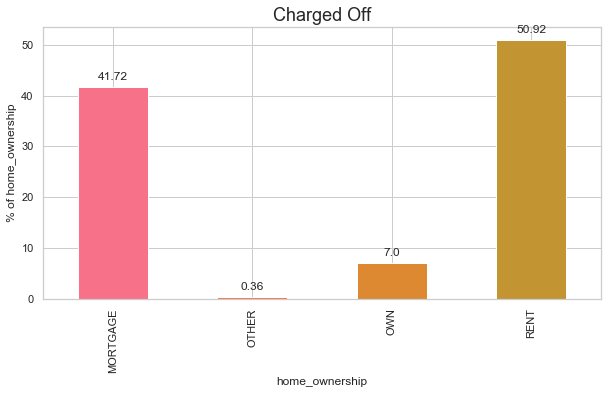

In [69]:
per_plot(loan,'home_ownership')

- Person paying Mortgage or rent is more likely to recieve a loan 

#### Verification status: 

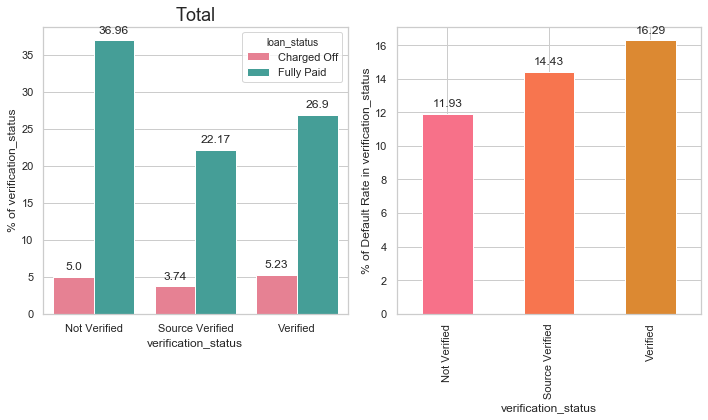

In [70]:
percent(loan,'verification_status',(10,6))

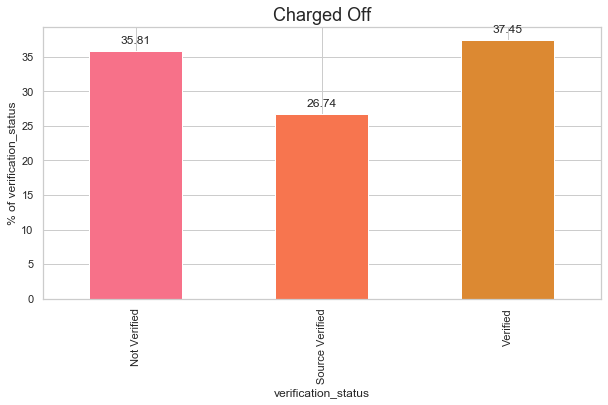

In [71]:
per_plot(loan,'verification_status')

- Not verified applicant recieved more no of loans. This is not expected

#### Annual Income:

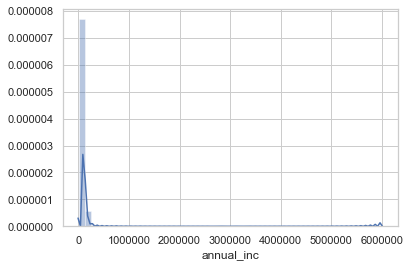

               count          mean           std     min      25%      50%  \
loan_status                                                                  
Charged Off   4943.0  63019.486686  47410.855336  4080.0  38400.0  54000.0   
Fully Paid   30424.0  70083.236679  66215.462181  4000.0  42000.0  60000.0   

                 75%        max  
loan_status                      
Charged Off  75000.0  1250000.0  
Fully Paid   84000.0  6000000.0  


In [72]:
distribution(loan,'annual_inc')

In [73]:
loan.annual_inc.describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [74]:
#Removing outliers More than I3 +1.5 IQR
df=loan[loan.annual_inc<=144000]

In [75]:
df.annual_inc.describe()

count     33747.000000
mean      61719.146652
std       27763.774295
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78281.170000
max      144000.000000
Name: annual_inc, dtype: float64

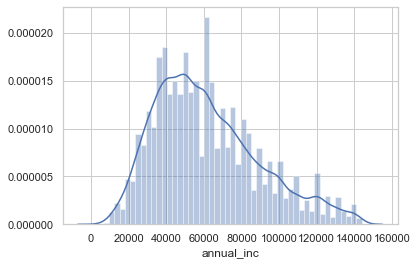

               count          mean           std     min      25%      50%  \
loan_status                                                                  
Charged Off   4770.0  57365.927623  26531.456912  4080.0  38000.0  52800.0   
Fully Paid   28977.0  62435.744463  27896.824130  4000.0  41000.0  58000.0   

                 75%       max  
loan_status                     
Charged Off  72000.0  144000.0  
Fully Paid   80000.0  144000.0  
Mean salary 61719.14665155418


In [76]:
distribution(df,'annual_inc')
print('Mean salary',df.annual_inc.mean())

- Median average salary is 60000 and defaulters median is 52800 which shows less annual income people are more likely to default  

In [77]:
#Creating Derived categorical variable for making bins of annual income
df['annual_inc_bin'] = pd.cut(df['annual_inc'], [x for x in range(0, 175000, 25000)],
                                 labels=[str(x)+'-'+str(x+25)+'k' for x in range (0, 150, 25)])

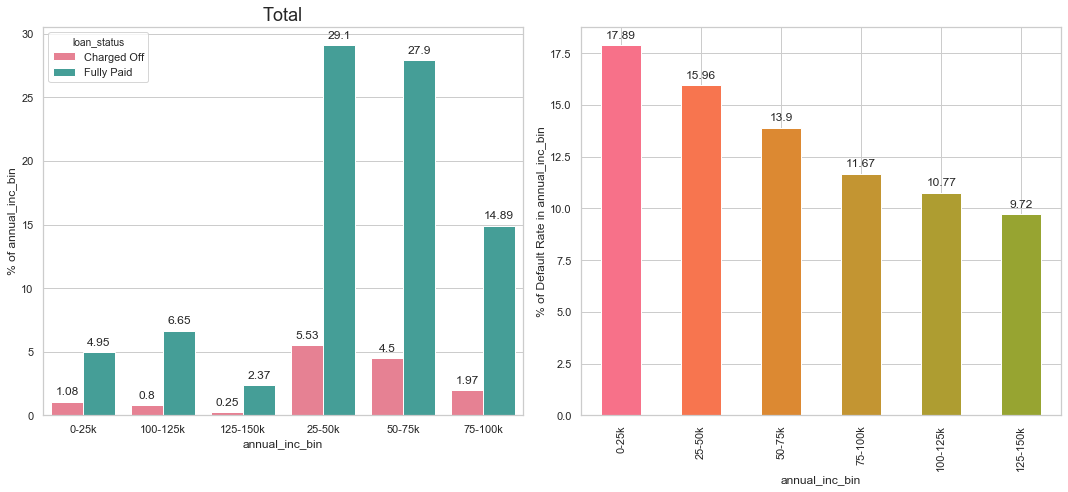

In [78]:
percent(df,'annual_inc_bin')

- Most of the annual income is in the range of 25-75k
- People with lesser annual income are more likely to default

#### Purpose of loan:

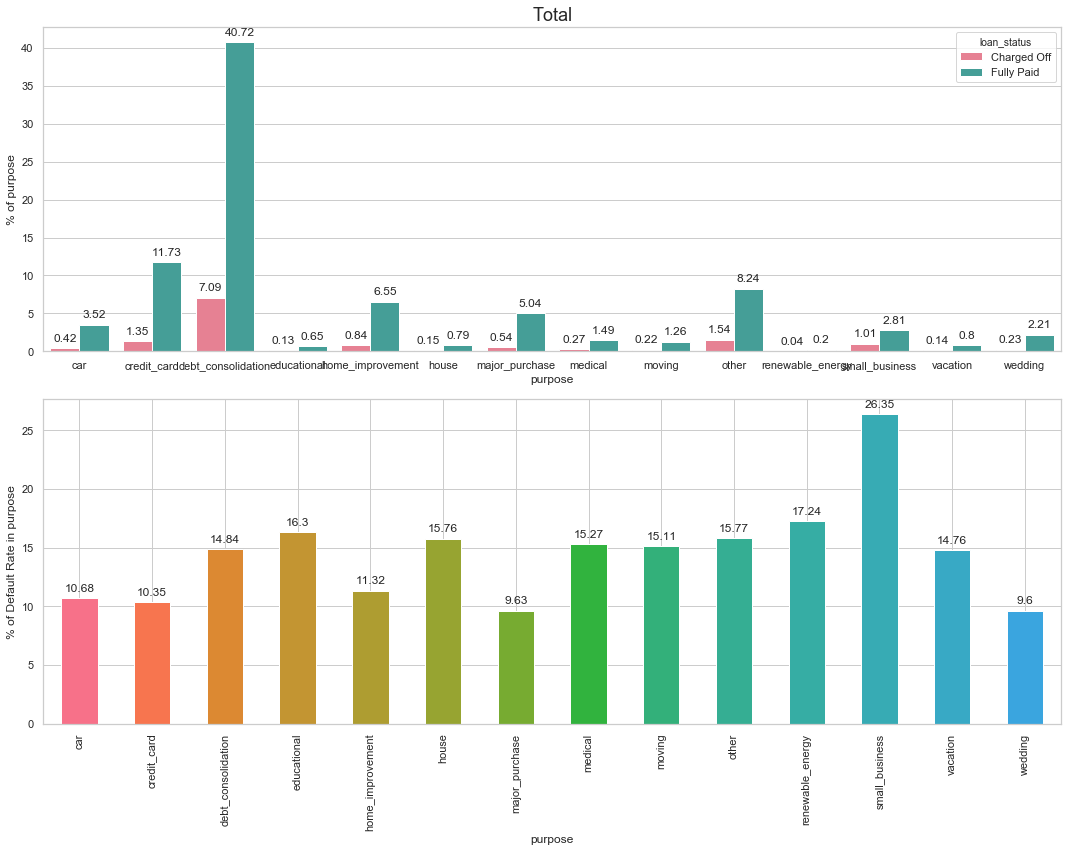

In [79]:
percent(loan,'purpose',(15,12),2,1)

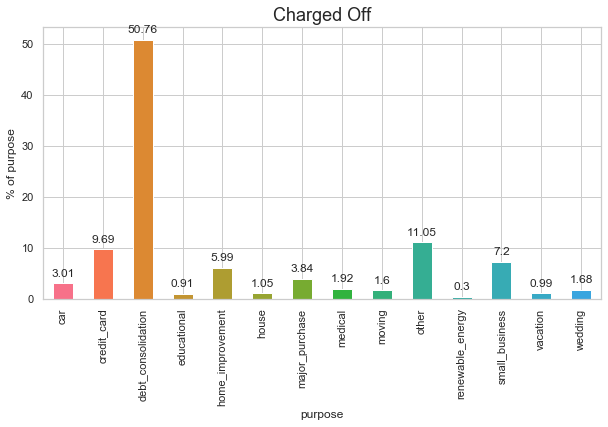

In [80]:
per_plot(loan,'purpose')

- Most of the loans are given for the purpose of debt consolidation
- Loan taken for small buisness is most likely to default but percentage of loan is very small

#### State Address:

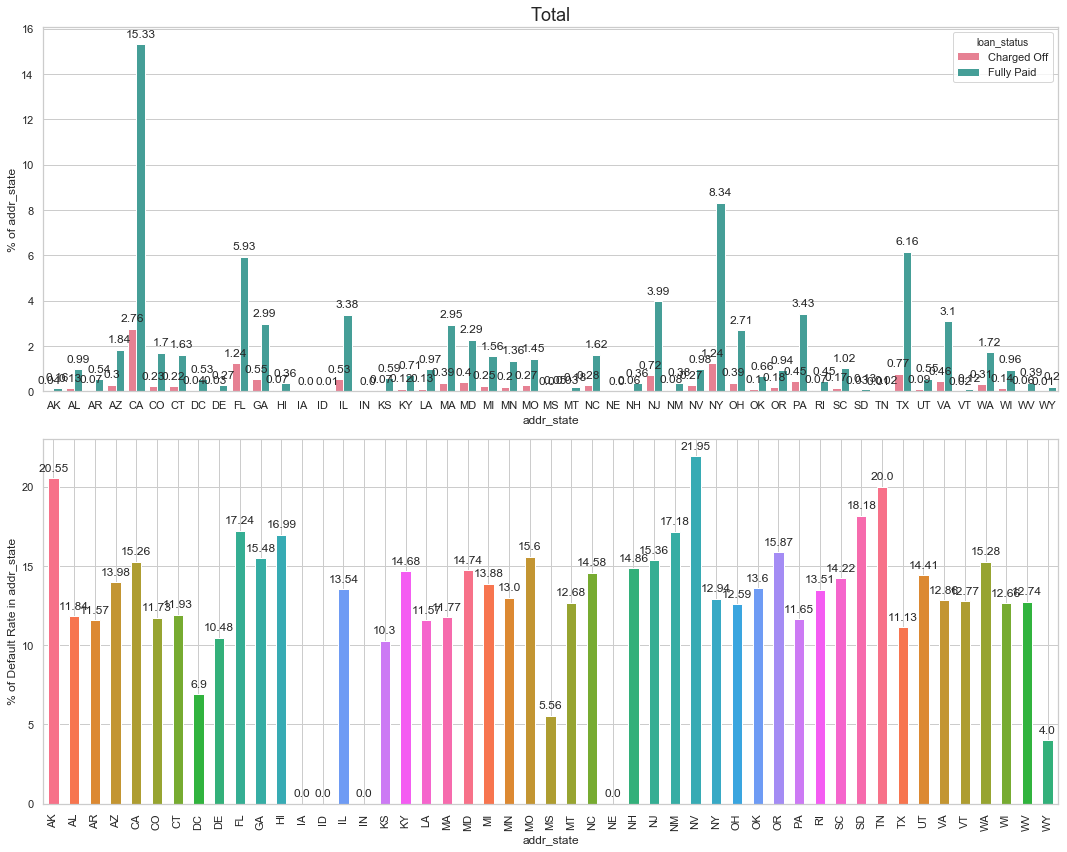

In [81]:
percent(loan,'addr_state',(15,12),2,1)

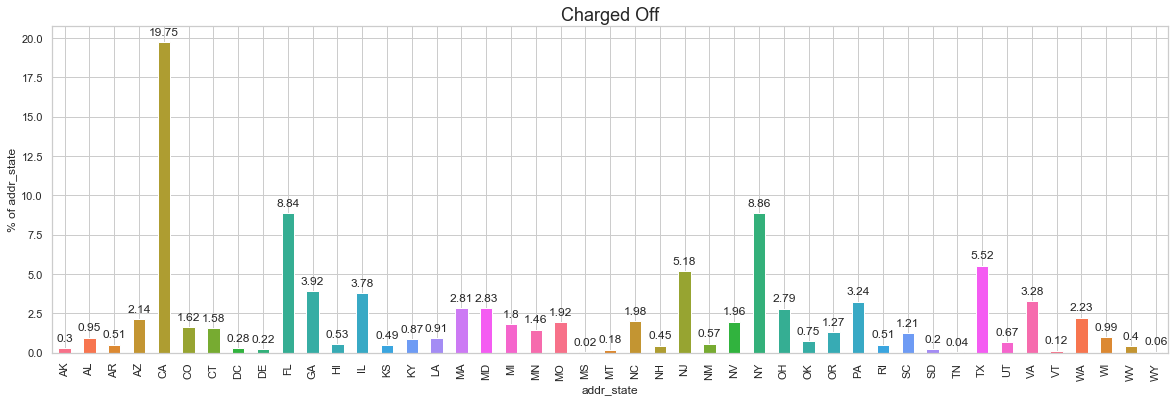

In [82]:
per_plot(loan,'addr_state',(20,6))

- Most of the loans is from California, New York, Texas, Florida.
- State with high default rate has very low no of loans to be judged

#### dti:

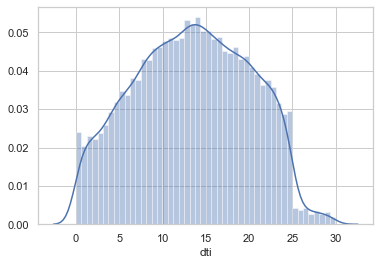

               count       mean       std  min    25%     50%    75%    max
loan_status                                                                
Charged Off   4943.0  14.160908  6.522564  0.0  9.355  14.440  19.34  29.85
Fully Paid   30424.0  13.280979  6.646843  0.0  8.160  13.345  18.53  29.99
Mean dti : 13.403961037124999


In [83]:
distribution(loan,'dti')
print('Mean dti :',loan.dti.mean())

In [84]:
loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [85]:
#Creating Derived categorical variable for making bins of dti
loan['dti_bin'] = pd.cut(loan['dti'], [x for x in range(0, 35, 5)],
                                 labels=[str(x)+'-'+str(x+5) for x in range (0, 30, 5)])

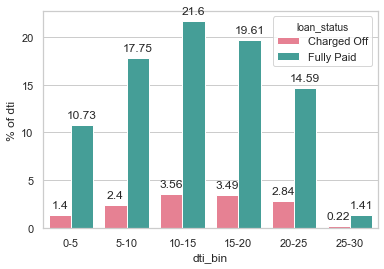

In [86]:
#percent(loan,'dti_bin')
a=sns.barplot(data=loan,x='dti_bin',y='term',hue='loan_status',estimator=lambda x:len(x) / len(loan) * 100,palette="husl")
a.set_ylabel('% of '+'dti')
annot(a)
plt.show()

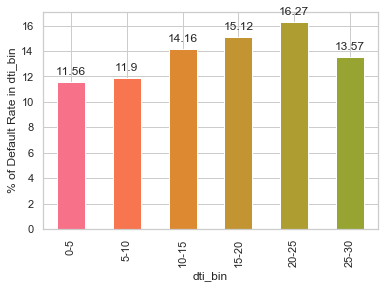

In [87]:
grp = loan.groupby(['loan_status','dti_bin'])['dti_bin'].count()
cnt = loan.groupby('dti_bin')['dti_bin'].count()
percentages = grp.unstack() * 100 / cnt.T
a = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 20))
annot(a)
a.set_ylabel('% of '+ 'Default Rate in '+'dti_bin')
plt.show()

- Debt to income ratio with value 10-15 recieved maximum loan
- Higher dti value is more likely to default

#### delinq_2yrs:

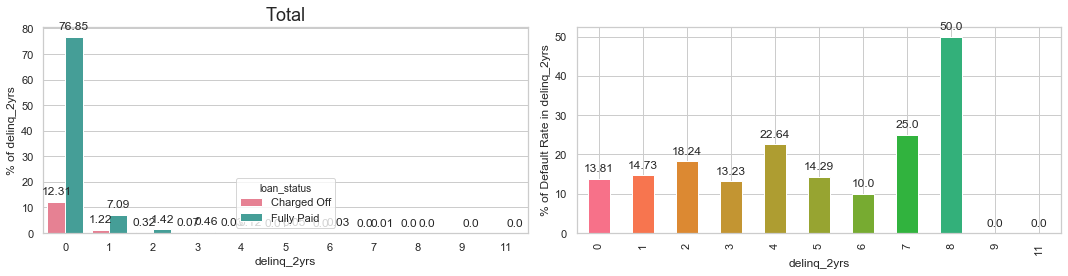

In [88]:
percent(loan,'delinq_2yrs',(15,4))

- Higher chances of default is for delinq_2yrs between 4-8 but no of loans is way to less to say anything. Most of the loan has delinq_2yrs equal to zero

#### Earliest credit line:

In [89]:
loan['earliest_cr_line_year'].value_counts()

2000    2947
1999    2695
1998    2569
2001    2308
1997    2207
1996    2003
1995    1903
1994    1785
2002    1762
2003    1698
2004    1606
2005    1381
1993    1347
2006    1065
1992     937
1990     915
1991     853
1989     755
2007     655
1988     643
1987     539
1986     428
1985     385
1984     349
1983     282
1982     188
1981     149
1980     145
2008     139
1979     133
1978     126
1977      87
1976      70
1975      57
1974      49
1973      39
1970      35
1971      33
1972      29
1969      22
1967      12
1968      12
1966       7
1965       5
1963       4
1962       3
1964       2
1956       1
1954       1
1950       1
1946       1
Name: earliest_cr_line_year, dtype: int64

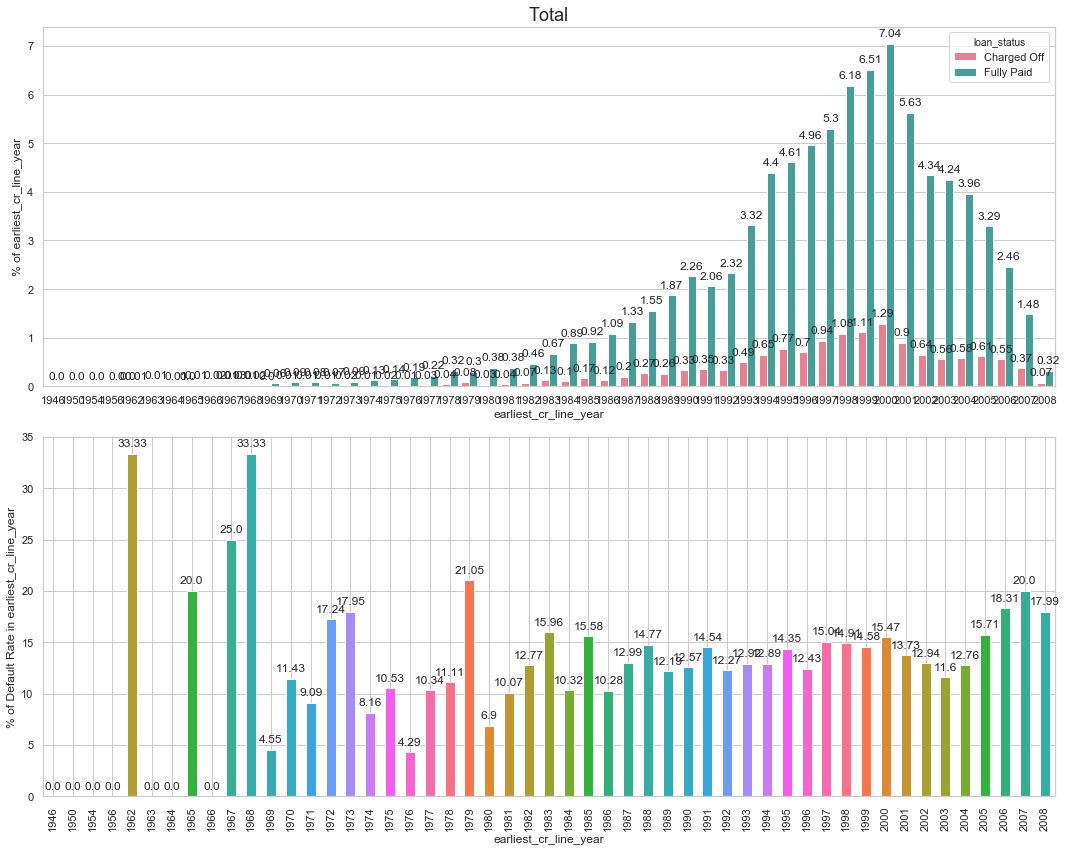

In [90]:
percent(loan,'earliest_cr_line_year',(15,12),2,1)

- Most of the earliest line of credit were given around 2000.
- Initial large bars till 1970 is due to very less count, other than that people of earliest credit in year 1979 and around 2007 has defaulted more. This might be due to economical crisis 

#### Inquiries in last 6 months 

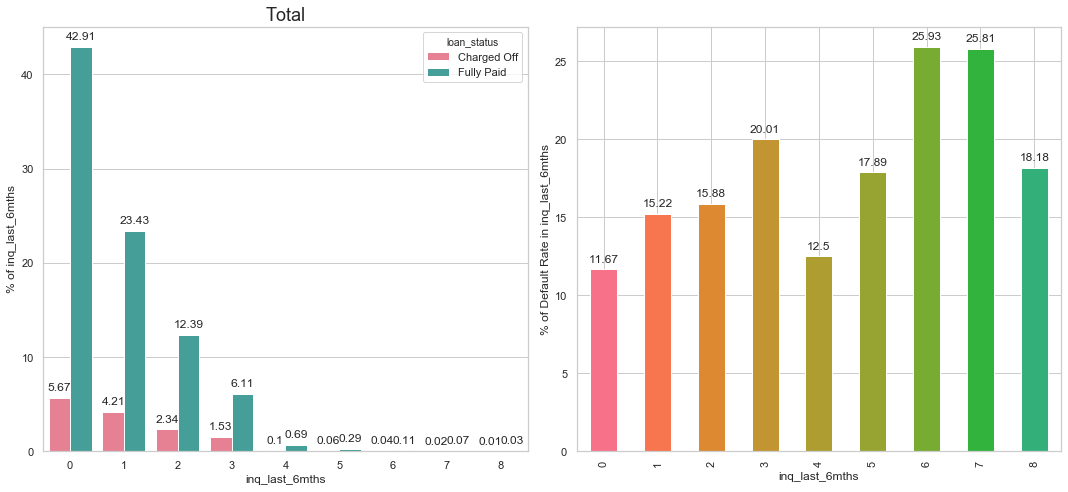

In [91]:
percent(loan,'inq_last_6mths')

- Around 49% loan has zero enquiries. Around 6-7 enquiries are more likely to default

#### open_acc:

In [92]:
loan.open_acc.value_counts()

7     3584
6     3519
8     3506
9     3341
10    2863
5     2815
11    2485
12    2055
4     2041
13    1709
14    1327
3     1294
15    1069
16     847
17     658
18     489
2      477
19     361
20     263
21     222
22     128
23      83
24      64
25      50
26      29
28      22
27      20
30      13
29      12
34       5
31       5
33       3
32       2
36       2
35       1
38       1
39       1
44       1
Name: open_acc, dtype: int64

In [93]:
#Creating Derived categorical variable for making bins of open credit lines
loan['open_acc_bin'] = pd.cut(loan['open_acc'], [x for x in range(0, 50, 5)],
                                 labels=[str(x)+'-'+str(x+5) for x in range (0, 45, 5)])

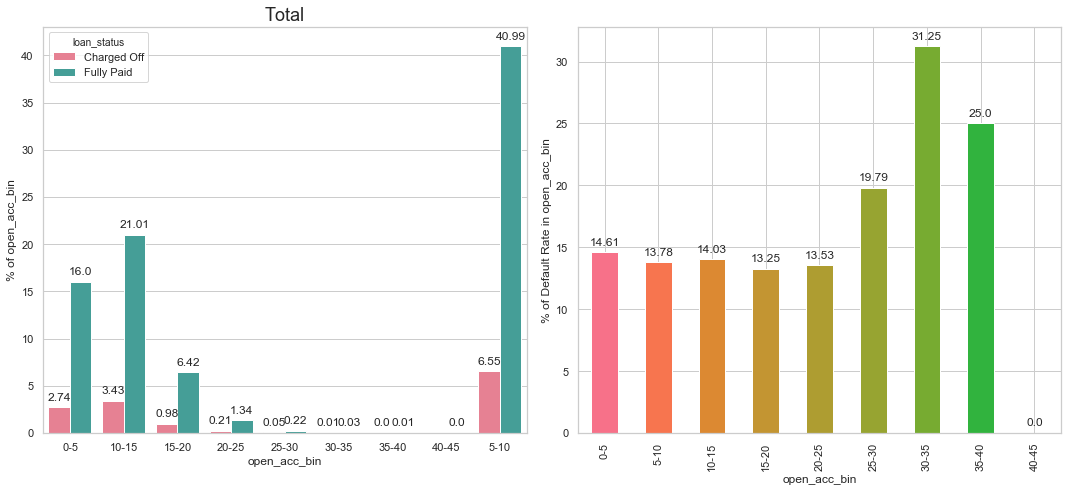

In [94]:
percent(loan,'open_acc_bin')

- More no of credit line leads to more default rate

#### Derogatory public records :

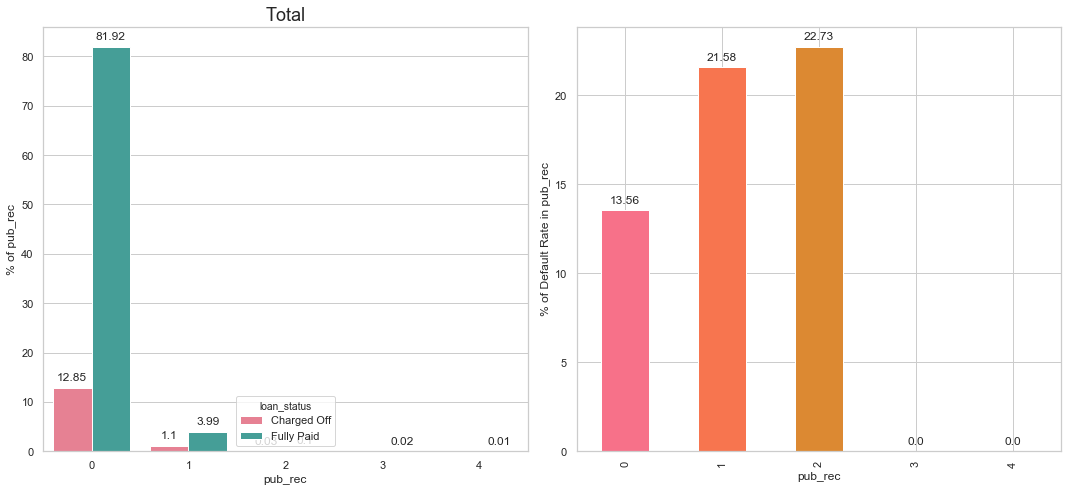

In [95]:
percent(loan,'pub_rec')

- More number of derogatory public records has more default rate 

#### Public record of bankruptcies 

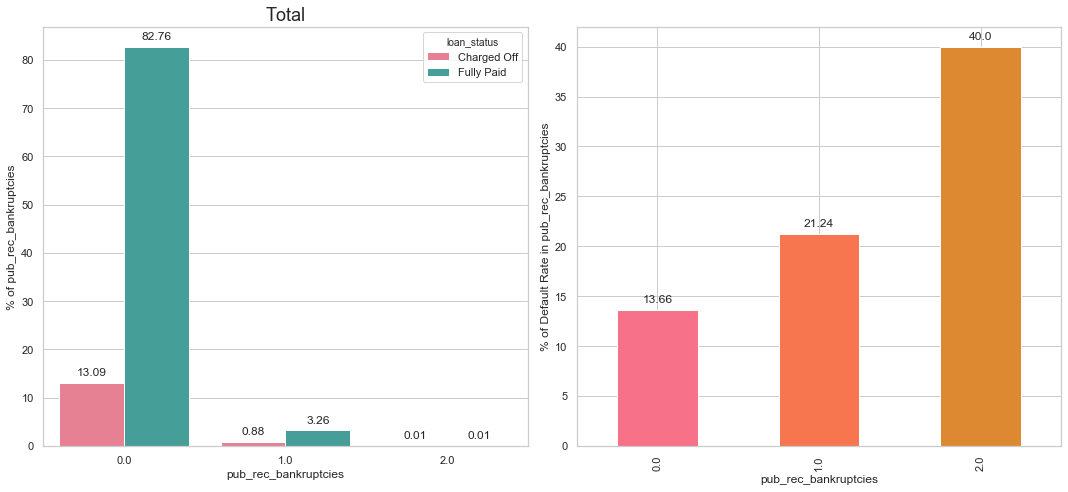

In [97]:
percent(loan,'pub_rec_bankruptcies')

#### Revolving balance:

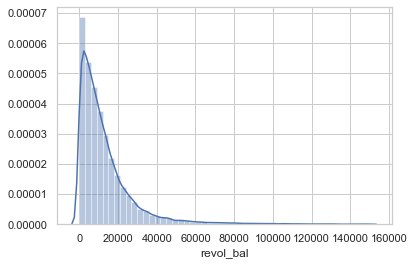

               count          mean           std  min     25%     50%  \
loan_status                                                             
Charged Off   4943.0  13680.089824  14768.969553  0.0  4246.5  9562.0   
Fully Paid   30424.0  13316.918847  15820.937992  0.0  3711.0  8833.0   

                 75%       max  
loan_status                     
Charged Off  17809.0  147365.0  
Fully Paid   16941.0  149588.0  


In [98]:
distribution(loan,'revol_bal')

In [99]:
#Creating Derived categorical variable for making bins of open credit lines
loan['revol_bal_bin'] = pd.cut(loan['revol_bal'], [x for x in range(0, 180000, 30000)],
                                 labels=[str(x)+'-'+str(x+30)+'k' for x in range (0, 150, 30)])

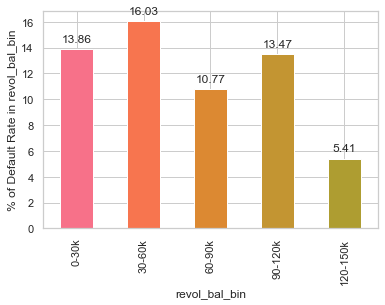

In [100]:
grp = loan.groupby(['loan_status','revol_bal_bin'])['revol_bal_bin'].count()
cnt = loan.groupby('revol_bal_bin')['revol_bal_bin'].count()
percentages = grp.unstack() * 100 / cnt.T
a = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('husl', 20))
annot(a)
a.set_ylabel('% of '+ 'Default Rate in '+'revol_bal_bin')
plt.show()

- All revolving balance are almost equally likely to default

#### total_acc :

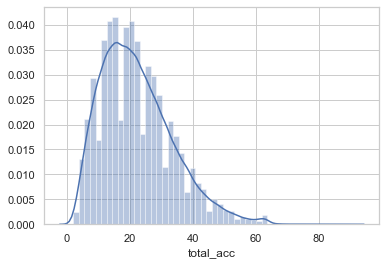

               count       mean        std  min   25%   50%   75%   max
loan_status                                                            
Charged Off   4943.0  21.730123  11.438113  2.0  13.0  20.0  29.0  70.0
Fully Paid   30424.0  22.287043  11.395624  3.0  14.0  21.0  29.0  90.0


In [101]:
distribution(loan,'total_acc')

- No conclusion, Both defaulter and paid are almost same

#### tot_pymnt : 

In [102]:
# Creating derived variable rtf which is ratio of total payment to funded amount
loan['rtf']=loan.total_pymnt/loan.funded_amnt
loan.rtf.describe()

count    35367.000000
mean         1.099139
std          0.260647
min          0.004940
25%          1.085306
50%          1.147947
75%          1.216993
max          1.688852
Name: rtf, dtype: float64

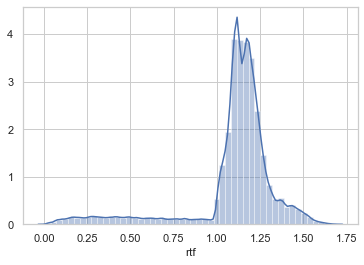

               count      mean       std       min       25%       50%  \
loan_status                                                              
Charged Off   4943.0  0.585170  0.327991  0.004940  0.308924  0.545902   
Fully Paid   30424.0  1.182644  0.107731  1.004573  1.110100  1.167394   

                  75%       max  
loan_status                      
Charged Off  0.845007  1.581723  
Fully Paid   1.228401  1.688852  


In [103]:
distribution(loan,'rtf')

- The total payment recieved to funded amount ratio is very less for defaulters compared to Fully paid.

## Bivariate analysis

#### Annual income vs funded amount

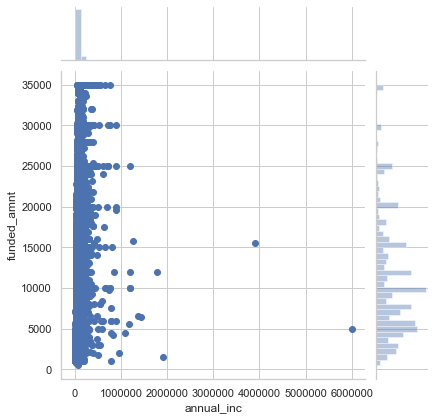

In [104]:
sns.jointplot(loan['annual_inc'], loan['funded_amnt'])
plt.show()

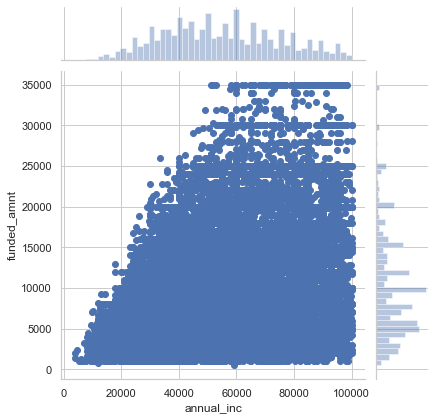

In [105]:
sns.jointplot('annual_inc', 'funded_amnt', loan.loc[loan['annual_inc']<100000])
plt.show()

- SomePeople in the salary range of 50k are taking loan of more than 50% of salary which can lead to defaulters

#### Funded amount vs Term 

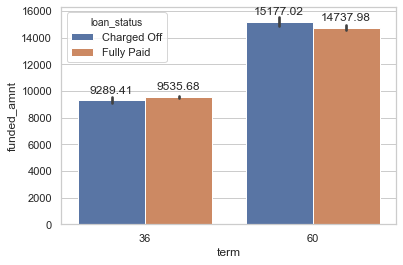

In [106]:
a=sns.barplot(data=loan,x='term',y='funded_amnt',hue='loan_status',estimator=np.mean)
annot(a)

- Larger amount of loan is given for larger term and larger amount has more default rate

### Heatmap : Correlation between variables 

In [107]:
cor=loan.corr()

In [108]:
cor['funded_amnt']

funded_amnt                 1.000000
int_rate                    0.304762
installment                 0.956774
annual_inc                  0.254826
dti                         0.063400
delinq_2yrs                -0.035385
inq_last_6mths              0.010274
open_acc                    0.172832
pub_rec                    -0.047589
revol_bal                   0.312445
revol_util                  0.071492
total_acc                   0.250021
out_prncp                        NaN
out_prncp_inv                    NaN
total_pymnt                 0.901396
total_pymnt_inv             0.878123
total_rec_prncp             0.867276
total_rec_int               0.737620
total_rec_late_fee          0.048844
recoveries                  0.143877
collection_recovery_fee     0.081013
last_pymnt_amnt             0.481652
pub_rec_bankruptcies       -0.031676
earliest_cr_line_month     -0.015252
earliest_cr_line_year      -0.188120
issue_d_month               0.041368
issue_d_year                0.129692
l

In [109]:
cor.drop(['out_prncp','out_prncp_inv'],axis=1,inplace=True)
cor.drop(['out_prncp','out_prncp_inv'],axis=0,inplace=True)

In [110]:
i=['funded_amnt','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','last_pymnt_amnt','pub_rec_bankruptcies','earliest_cr_line_year','issue_d_year','last_pymnt_d_year','last_credit_pull_d_year']

In [111]:
cor=loan[i].corr()

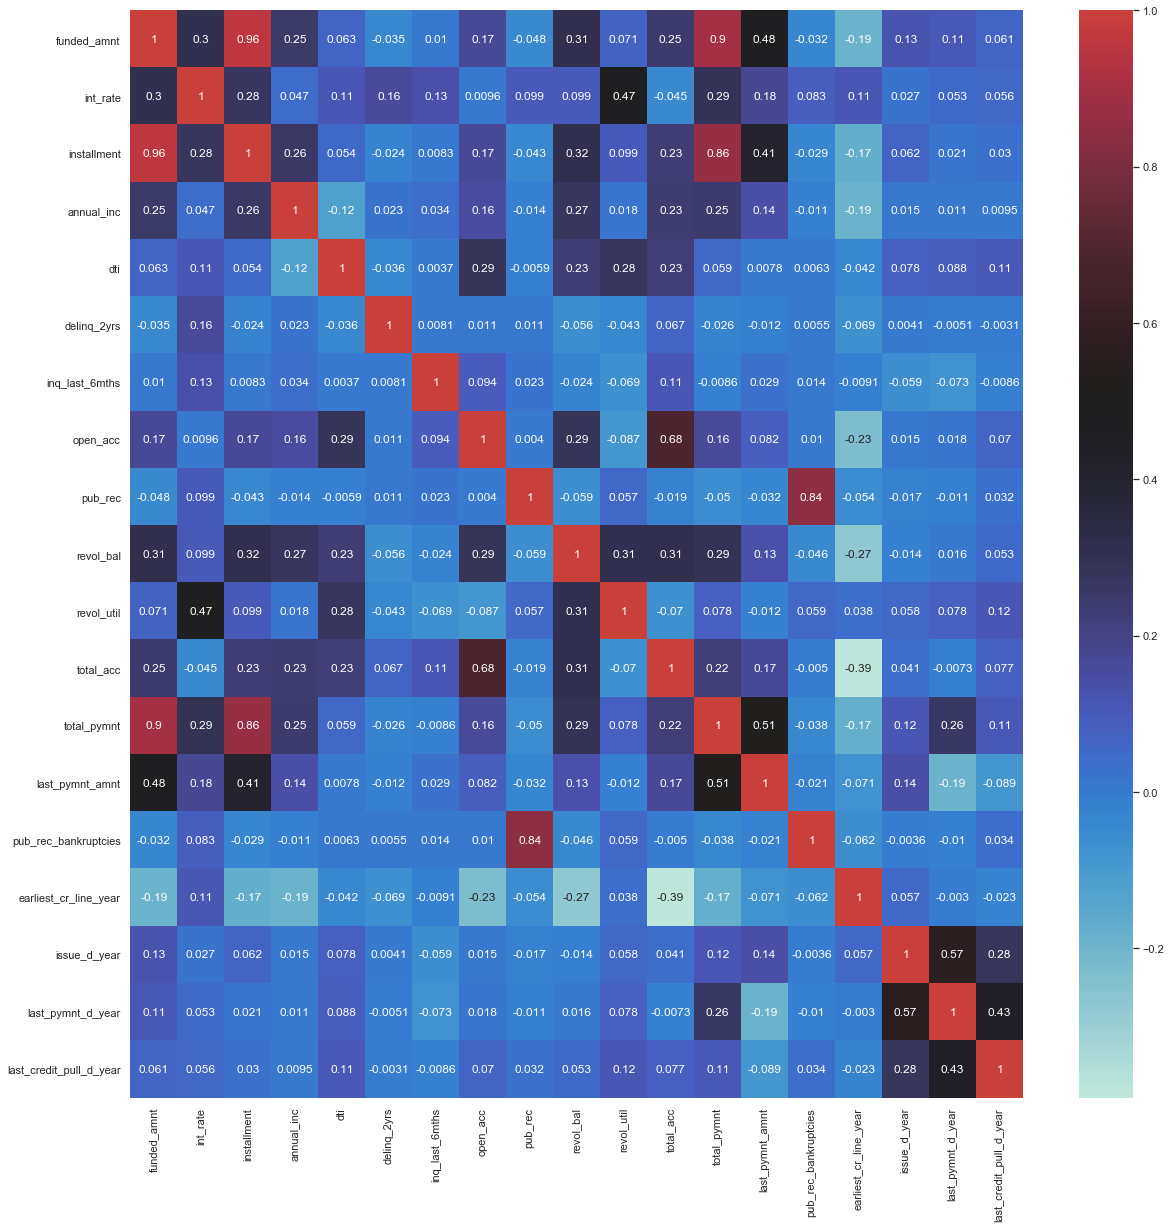

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True, center=0.5)

- There are very few correlations. That too obvious ones